## Projet réseau de transport

#### tableau d'adjacence


|Sommet|sommet adjacents|
|-----|-----|
|Lyon       |Toulouse|
|Paris      |Lyon,Bordeaux,Toulouse|
|Bordeaux   |Paris,S3|
|Toulouse   |Marseille|
|Marseille  |Bordeaux|
|Rennes     |Lille, Paris |
|Lille      |Rennes   |

#### Matrice d'adjacence

$X = \begin{bmatrix}
0 & 2 & 0 & 1 & 0 & 0 & 1\\
0 & 0 & 3 & 0 & 0 & 4 & 0\\
0 & 3 & 0 & 0 & 2 & 0 & 0\\
2 & 4 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 2\\
0 & 0 & 0 & 0 & 0 & 2 & 0
\end{bmatrix}$

In [1]:
from libGraph import matrix_to_graph, Graph, Node
import numpy as np
from ipywidgets import Dropdown, interactive_output, VBox

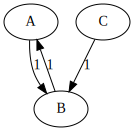

In [2]:
# Test simple graph
test1 = np.array([
    # A B
    [0, 1, 0],
    [1, 0, 1],
    [0, 0, 0]
])

graph1 = matrix_to_graph(test1, ["A", "B", "C"])

graph1.show()

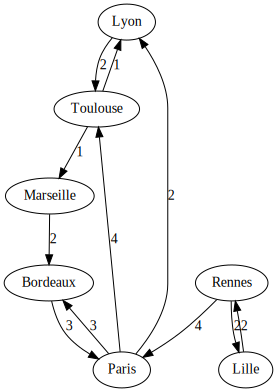

In [3]:
# Init transport network
data = np.array([
       [0, 2, 0, 1, 0, 0, 0],
       [0, 0, 3, 0, 0, 4, 0],
       [0, 3, 0, 0, 2, 0, 0],
       [2, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 2, 0]
])

cities = ["Lyon", "Paris", "Bordeaux", "Toulouse", "Marseille", "Rennes", "Lille"]

graph = matrix_to_graph(data, cities)

graph.show()

[[0 1 0]
 [1 0 1]
 [0 0 0]]


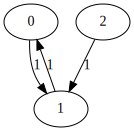

In [4]:
# Reverse matrix from graph
mx = graph1.matrix_from_graph()
print(mx)

new_graph = matrix_to_graph(mx)

new_graph.show()

In [5]:
def form_itinary(callback: callable, locations: list):
    if len(locations) <= 1:
        print('Need more than one location')
        return

    src = Dropdown(options=locations, value=locations[0], description='Choix du départ:')

    dest = Dropdown(options=locations, value=locations[0], description='Choix de la destination:')

    def show(src, dest):
        if src == dest:
            return

        src, dest = (graph.get_by_tag(src), graph.get_by_tag(dest))

        if not src.is_reachable(dest):
            print('No path available')
            return

        print(callback(src, dest))

    out = interactive_output(show, {'src': src, 'dest': dest})

    return VBox([VBox([src, dest]), out])


In [6]:
def deep_search_process(src: Node, dest: Node):

    visited = src.deep_search(dest)

    return Graph._to_tags(visited)

form_itinary(deep_search_process, graph.to_tags())


In [7]:
def dijkstra_process(src: Node, dest: Node):
    path, dist = src.dijkstra(dest, graph.nodes)
    print("Distance : %s" % dist)

    return Graph._to_tags(path)

form_itinary(dijkstra_process, graph.to_tags())